In [222]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
#loading dataset
data=pd.read_csv("Employee.csv")
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [226]:
# 1.Explore the data, list down the unique values in each feature and find its length.Perform the statistical analysis and renaming of the columns

In [228]:
#Unique values in each feature
unique_values = {col: data[col].dropna().unique().tolist() for col in data.columns}
unique_counts = {col: len(data[col].dropna().unique()) for col in data.columns}
for col, values in unique_values.items():
    print(f"{col}: {unique_counts[col]} unique values \n{values}\n")

Company: 6 unique values 
['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant', 'Infosys Pvt Lmt']

Age: 29 unique values 
[20.0, 30.0, 35.0, 40.0, 23.0, 34.0, 45.0, 18.0, 22.0, 32.0, 37.0, 50.0, 21.0, 46.0, 36.0, 26.0, 41.0, 24.0, 25.0, 43.0, 19.0, 38.0, 51.0, 31.0, 44.0, 33.0, 17.0, 0.0, 54.0]

Salary: 40 unique values 
[2300.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 1089.0, 1234.0, 3030.0, 3045.0, 3184.0, 4824.0, 5835.0, 7084.0, 8943.0, 8345.0, 9284.0, 9876.0, 2034.0, 7654.0, 2934.0, 4034.0, 5034.0, 8202.0, 9024.0, 4345.0, 6544.0, 6543.0, 3234.0, 4324.0, 5435.0, 5555.0, 8787.0, 3454.0, 5654.0, 5009.0, 5098.0, 3033.0]

Place: 11 unique values 
['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin', 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune']

Country: 1 unique values 
['India']

Gender: 2 unique values 
[0, 1]



In [230]:
# length of unique value
length_unique=data.nunique()
print (length_unique)

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64


In [232]:
# Statistical Analysis
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [234]:
# renaming the columns
data.rename(columns={
                 'Company':'Company_Name',
                 'Age':'Emp_Age',
                 'Salary':'Emp_Salary',
                 'Place':'Location',
                 'Country':'Country_Name',
                 'Gender':'Sex'
                 },inplace=True)

In [236]:
data.head()

,Company_Name,Emp_Age,Emp_Salary,Location,Country_Name,Sex
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [238]:
# 2 :Data Cleaning :Find the missing and inappropriate values, treat them appropriately.Remove all duplicate rows.Find the outliers.Replace the value 0 in age as NaN
# Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [240]:
#Finding missing values
data.isnull().sum()

Company_Name     8
Emp_Age         18
Emp_Salary      24
Location        14
Country_Name     0
Sex              0
dtype: int64

In [242]:
#Checking for duplicate rows
data.duplicated().sum()

4

In [244]:
# removing duplicate rows
data.drop_duplicates(inplace=True)

In [246]:
#rechecking for duplicated rows
data.duplicated().sum()

0

In [248]:
# Replacing zero as NaN
data['Emp_Age']=data['Emp_Age'].replace(0,np.nan)

In [250]:
# Outlier for Emp_Age
Q1 = data['Emp_Age'].quantile(0.25)
Q3= data['Emp_Age'].quantile(0.75)
IQR= Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3+ 1.5 * IQR

print("Emp_Age Outliers")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

outliers_age = data[(data['Emp_Age'] < lower_bound) | (data['Emp_Age'] > upper_bound)]

Emp_Age Outliers
Q1: 23.0
Q3: 40.0
IQR: 17.0
Lower Bound: -2.5
Upper Bound: 65.5


In [252]:
Q1 = data['Emp_Salary'].quantile(0.25)
Q3= data['Emp_Salary'].quantile(0.75)
IQR= Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3+ 1.5 * IQR

print("Emp_Salary Outliers")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Emp_Salary Outliers
Q1: 3030.0
Q3: 8000.0
IQR: 4970.0
Lower Bound: -4425.0
Upper Bound: 15455.0


In [254]:
# Treating null values
data['Emp_Age'].fillna(data['Emp_Age'].median(),inplace=True)              # Null value replaced with median
data['Emp_Salary'].fillna(data['Emp_Salary'].median(),inplace=True)        # Null value replaced with median
data['Company_Name'].fillna(data['Company_Name'].mode()[0],inplace=True)   # null value is replaced with mode.
data['Location'].fillna(data['Location'].mode()[0],inplace=True)           #null value is replaced with mode

C:\Users\sam00\AppData\Local\Temp\ipykernel_24408\3864846083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Emp_Age'].fillna(data['Emp_Age'].median(),inplace=True)              # Null value replaced with median
C:\Users\sam00\AppData\Local\Temp\ipykernel_24408\3864846083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [256]:
# 3 :Data Analysis-Filter the data with age >40 and salary<5000.Plot the chart with age and salary.Count the number of people from each place and represent it visually

In [258]:
# Filtering data with age >40 and salary <5000
filtered_data = data[(data['Emp_Age'] > 40) & (data['Emp_Salary'] < 5000)]
print("Data with Age > 40 & Salary < 5000):")
print(filtered_data)

Data with Age > 40 & Salary < 5000):
    Company_Name  Emp_Age  Emp_Salary   Location Country_Name  Sex
21       Infosys     50.0      3184.0      Delhi        India    0
32       Infosys     45.0      4034.0   Calcutta        India    0
39       Infosys     41.0      3000.0     Mumbai        India    0
50       Infosys     41.0      3000.0    Chennai        India    0
57       Infosys     51.0      3184.0  Hyderabad        India    0
68       Infosys     43.0      4034.0     Mumbai        India    0
75       Infosys     44.0      3000.0     Cochin        India    0
86       Infosys     41.0      3000.0      Delhi        India    0
93       Infosys     54.0      3184.0     Mumbai        India    0
104      Infosys     44.0      4034.0      Delhi        India    0
122      Infosys     44.0      3234.0     Mumbai        India    0
129      Infosys     50.0      3184.0   Calcutta        India    0
138          CTS     44.0      3033.0     Cochin        India    0
140      Infosys     44.0

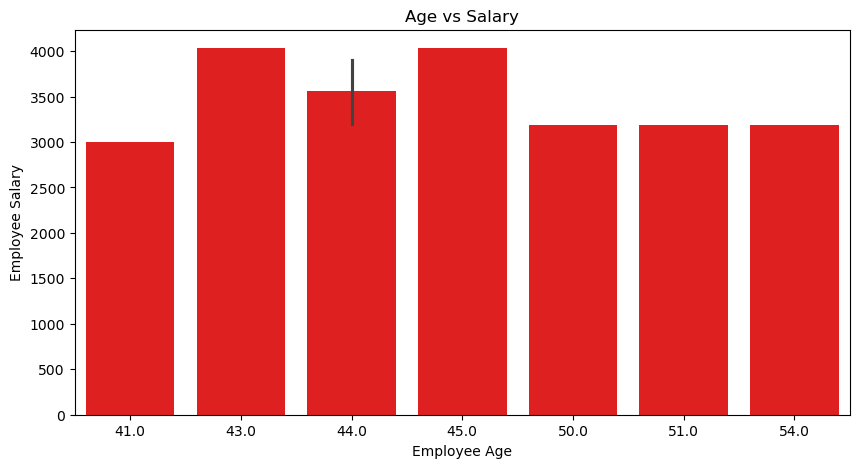

In [260]:
# Plotting age vs salary
plt.figure(figsize=(10, 5))
sns.barplot(data=filtered_data, x='Emp_Age',y='Emp_Salary', color='red')
plt.title('Age vs Salary')
plt.xlabel('Employee Age')
plt.ylabel('Employee Salary')
plt.show()

In [261]:
# Count of people and visual representation
countpeople=data['Location'].value_counts()
print("Count of people location wise :\n",countpeople)


Count of people location wise :
 Location
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


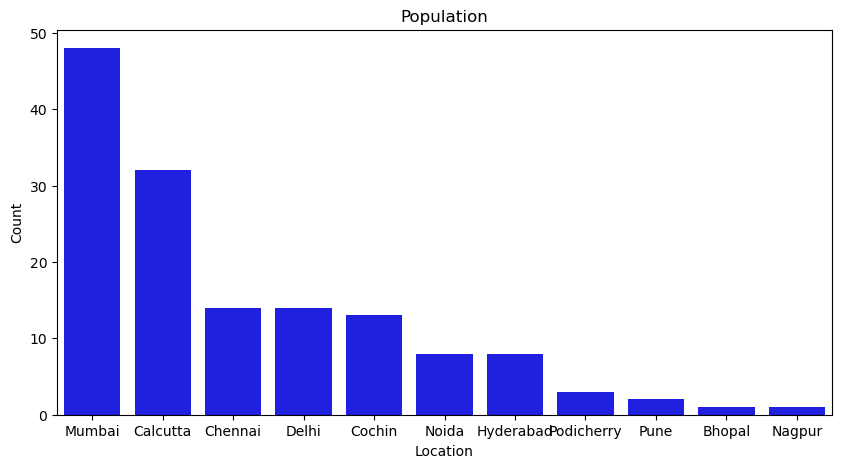

In [264]:
plt.figure(figsize=(10, 5))
sns.barplot(x=countpeople.index, y=countpeople.values,color='blue')
plt.title('Population')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [266]:
# 4.Data Encoding-Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms

In [268]:
categorical_features = ['Company_Name','Location','Country_Name']
numerical_features = ['Emp_Age','Emp_Salary']
X = data.drop(columns = ['Sex']) 
y = data['Sex']

In [270]:
from sklearn.model_selection import train_test_split

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [274]:
from sklearn.preprocessing import OneHotEncoder

In [276]:
# one hot encoding
oe = OneHotEncoder(sparse_output=False) 
X_train_encode = X_train[categorical_features]
X_test_encode = X_test[categorical_features]


X_train_encoded = oe.fit_transform(X_train_encode)
X_test_encoded = oe.transform(X_test_encode)

In [278]:
features = oe.get_feature_names_out(categorical_features)
X_train_view = pd.DataFrame(X_train_encoded, columns = features)
X_train_view.head()

,Company_Name_CTS,Company_Name_Congnizant,Company_Name_Infosys,Company_Name_Infosys Pvt Lmt,Company_Name_TCS,Company_Name_Tata Consultancy Services,Location_Bhopal,Location_Calcutta,Location_Chennai,Location_Cochin,Location_Delhi,Location_Hyderabad,Location_Mumbai,Location_Nagpur,Location_Noida,Location_Podicherry,Location_Pune,Country_Name_India
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [280]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [282]:
categorical_features = ['Company_Name','Location','Country_Name']
data_encoded=data.copy()
for col in categorical_features:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])

In [284]:
# After encoding
encoded_data= pd.concat(
    [data[categorical_features],encoded_data[categorical_features]],
    axis=1
)
encoded_data

,Company_Name,Location,Country_Name,Company_Name,Company_Name,Company_Name,Company_Name,Location,Location,Location,Location,Country_Name,Country_Name,Country_Name,Country_Name
0,TCS,Chennai,India,TCS,TCS,TCS,4,Chennai,Chennai,Chennai,2,India,India,India,0
1,Infosys,Mumbai,India,Infosys,Infosys,Infosys,2,Mumbai,Mumbai,Mumbai,6,India,India,India,0
2,TCS,Calcutta,India,TCS,TCS,TCS,4,Calcutta,Calcutta,Calcutta,1,India,India,India,0
3,Infosys,Delhi,India,Infosys,Infosys,Infosys,2,Delhi,Delhi,Delhi,4,India,India,India,0
4,TCS,Mumbai,India,TCS,TCS,TCS,4,Mumbai,Mumbai,Mumbai,6,India,India,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,Mumbai,India,Infosys Pvt Lmt,Infosys Pvt Lmt,Infosys Pvt Lmt,3,Mumbai,Mumbai,Mumbai,6,India,India,India,0
143,TCS,Calcutta,India,TCS,TCS,TCS,4,Calcutta,Calcutta,Calcutta,1,India,India,India,0
145,Infosys,Delhi,India,Infosys,Infosys,Infosys,2,Delhi,Delhi,Delhi,4,India,India,India,0
146,TCS,Mumbai,India,TCS,TCS,TCS,4,Mumbai,Mumbai,Mumbai,6,India,India,India,0


In [286]:
#5.Feature Scaling-After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.¶

In [288]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [312]:
# Standard Scaling
numerical_features = ['Emp_Age', 'Emp_Salary']

In [324]:
scaler_standard = StandardScaler()
scaler_standard.fit_transform(data[numerical_features])

array([[-1.48467637, -0.10082748],
       [-0.26717411, -0.10082748],
       [ 0.34157702, -1.2437349 ],
       [ 0.95032816, -0.94742557],
       [-1.11942569, -0.52412653],
       [ 0.09807657, -0.10082748],
       [ 0.09807657,  0.32247156],
       [-1.11942569,  0.74577061],
       [ 0.2198268 ,  1.16906965],
       [ 1.55907929,  1.5923687 ],
       [-1.11942569, -0.10082748],
       [ 0.2198268 , -1.75635005],
       [ 1.55907929, -0.10082748],
       [-1.72817683, -1.69497168],
       [ 0.95032816, -0.94742557],
       [-1.11942569, -0.94742557],
       [-1.11942569, -0.9347266 ],
       [ 0.2198268 , -0.10082748],
       [-1.24117592, -0.10082748],
       [-0.02367366, -0.10082748],
       [ 0.58507748, -0.92837711],
       [ 2.16783042, -0.86953855],
       [-1.36292615, -0.17532811],
       [ 0.09807657,  0.25262722],
       [ 0.09807657,  0.78132773],
       [-1.11942569,  1.56824065],
       [ 0.2198268 ,  1.31510783],
       [ 1.55907929,  1.71258563],
       [-1.11942569,

In [308]:
#Minmax Scaler

scaler_minmax = MinMaxScaler()
scaler_minmax.fit_transform(data[numerical_features])

array([[0.08108108, 0.44508934],
       [0.35135135, 0.44508934],
       [0.48648649, 0.13781723],
       [0.62162162, 0.21748037],
       [0.16216216, 0.33128485],
       [0.43243243, 0.44508934],
       [0.43243243, 0.55889382],
       [0.16216216, 0.6726983 ],
       [0.45945946, 0.78650279],
       [0.75675676, 0.90030727],
       [0.16216216, 0.44508934],
       [0.45945946, 0.        ],
       [0.75675676, 0.44508934],
       [0.02702703, 0.01650165],
       [0.62162162, 0.21748037],
       [0.16216216, 0.21748037],
       [0.16216216, 0.2208945 ],
       [0.45945946, 0.44508934],
       [0.13513514, 0.44508934],
       [0.40540541, 0.44508934],
       [0.54054054, 0.22260157],
       [0.89189189, 0.23842039],
       [0.10810811, 0.42505975],
       [0.43243243, 0.54011608],
       [0.43243243, 0.68225788],
       [0.16216216, 0.89382042],
       [0.45945946, 0.82576534],
       [0.75675676, 0.93262775],
       [0.16216216, 1.        ],
       [0.48648649, 0.10754524],
       [0.